In [61]:
from datetime import datetime, timedelta
import pandas as pd
import geopandas as gpd
import json
import mapclassify
import matplotlib.pyplot as plt
import numpy as np
import os
import requests
from io import StringIO
import warnings

warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', None)
pd.set_option("display.max_rows", None)
np.set_printoptions(threshold=np.inf)
from IPython.display import clear_output

### Age and Sex Data

In [62]:
# loading age_sex data at census tract granularity
a_s = pd. read_csv("C:/Users/sreya/Desktop/census_NYC/age_sex.csv")
age_sex = pd.DataFrame(a_s)
age_sex.head()

,Geography,Geographic Area Name,Estimate!!Total!!Total population,Annotation of Estimate!!Total!!Total population,Estimate!!Total!!Total population!!AGE!!Under 5 years,Margin of Error!!Total!!Total population!!AGE!!Under 5 years,Annotation of Margin of Error!!Total!!Total population!!AGE!!Under 5 years,Annotation of Estimate!!Total!!Total population!!AGE!!Under 5 years,Estimate!!Total!!Total population!!AGE!!5 to 9 years,Margin of Error!!Total!!Total population!!AGE!!5 to 9 years,Annotation of Margin of Error!!Total!!Total population!!AGE!!5 to 9 years,Annotation of Estimate!!Total!!Total population!!AGE!!5 to 9 years,Estimate!!Total!!Total population!!AGE!!10 to 14 years,Margin of Error!!Total!!Total population!!AGE!!10 to 14 years,Annotation of Margin of Error!!Total!!Total population!!AGE!!10 to 14 years,Annotation of Estimate!!Total!!Total population!!AGE!!10 to 14 years,Estimate!!Total!!Total population!!AGE!!15 to 19 years,Margin of Error!!Total!!Total population!!AGE!!15 to 19 years,Annotation of Margin of Error!!Total!!Total population!!AGE!!15 to 19 years,Annotation of Estimate!!Total!!Total population!!AGE!!15 to 19 years,Estimate!!Total!!Total population!!AGE!!20 to 24 years,Annotation of Estimate!!Total!!Total population!!AGE!!20 to 24 years,Margin of Error!!Total!!Total population!!AGE!!20 to 24 years,Annotation of Margin of Error!!Total!!Total population!!AGE!!20 to 24 years,Estimate!!Total!!Total population!!AGE!!25 to 29 years,Margin of Error!!Total!!Total population!!AGE!!25 to 29 years,Annotation of Margin of Error!!Total!!Total population!!AGE!!25 to 29 years,Annotation of Estimate!!Total!!Total population!!AGE!!25 to 29 years,Estimate!!Total!!Total population!!AGE!!30 to 34 years,Margin of Error!!Total!!Total population!!AGE!!30 to 34 years,Annotation of Margin of Error!!Total!!Total population!!AGE!!30 to 34 years,Annotation of Estimate!!Total!!Total population!!AGE!!30 to 34 years,Estimate!!Total!!Total population!!AGE!!35 to 39 years,Margin of Error!!Total!!Total population!!AGE!!35 to 39 years,Annotation of Margin of Error!!Total!!Total population!!AGE!!35 to 39 years,Annotation of Estimate!!Total!!Total population!!AGE!!35 to 39 years,Estimate!!Total!!Total population!!AGE!!40 to 44 years,Margin of Error!!Total!!Total population!!AGE!!40 to 44 years,Annotation of Margin of Error!!Total!!Total population!!AGE!!40 to 44 years,Annotation of Estimate!!Total!!Total population!!AGE!!40 to 44 years,Estimate!!Total!!Total population!!AGE!!45 to 49 years,Margin of Error!!Total!!Total population!!AGE!!45 to 49 years,Annotation of Margin of Error!!Total!!Total population!!AGE!!45 to 49 years,Annotation of Estimate!!Total!!Total population!!AGE!!45 to 49 years,Estimate!!Total!!Total population!!AGE!!50 to 54 years,Margin of Error!!Total!!Total population!!AGE!!50 to 54 years,Annotation of Margin of Error!!Total!!Total population!!AGE!!50 to 54 years,Annotation of Estimate!!Total!!Total population!!AGE!!50 to 54 years,Estimate!!Total!!Total population!!AGE!!55 to 59 years,Margin of Error!!Total!!Total population!!AGE!!55 to 59 years,Annotation of Margin of Error!!Total!!Total population!!AGE!!55 to 59 years,Annotation of Estimate!!Total!!Total population!!AGE!!55 to 59 years,Estimate!!Total!!Total population!!AGE!!60 to 64 years,Annotation of Estimate!!Total!!Total population!!AGE!!60 to 64 years,Margin of Error!!Total!!Total population!!AGE!!60 to 64 years,Annotation of Margin of Error!!Total!!Total population!!AGE!!60 to 64 years,Estimate!!Total!!Total population!!AGE!!65 to 69 years,Annotation of Estimate!!Total!!Total population!!AGE!!65 to 69 years,Margin of Error!!Total!!Total population!!AGE!!65 to 69 years,Annotation of Margin of Error!!Total!!Total population!!AGE!!65 to 69 years,Estimate!!Total!!Total population!!AGE!!70 to 74 years,Annotation of Estimate!!Total!!Total population!!AGE!!70 to 74 years,Margin of Error!!Total!!Total population!!AGE!!70 to 74 years,Annotation of Margin of Error!!Total!!Total 

In [63]:
age_sex.shape

(2327, 912)

In [64]:
# Dropping columns containing the string 'age' in their names
c1 = age_sex.columns[age_sex.columns.str.contains('Annotation of Estimate')]
c2 = age_sex.columns[age_sex.columns.str.contains('Margin of Error')]
columns_to_drop = c1.append(c2)
age_sex.drop(columns=columns_to_drop, inplace=True)
age_sex.shape

(2327, 230)

In [65]:
a_s_final = age_sex.iloc[:,0:21]
a_s_final.head()

,Geography,Geographic Area Name,Estimate!!Total!!Total population,Estimate!!Total!!Total population!!AGE!!Under 5 years,Estimate!!Total!!Total population!!AGE!!5 to 9 years,Estimate!!Total!!Total population!!AGE!!10 to 14 years,Estimate!!Total!!Total population!!AGE!!15 to 19 years,Estimate!!Total!!Total population!!AGE!!20 to 24 years,Estimate!!Total!!Total population!!AGE!!25 to 29 years,Estimate!!Total!!Total population!!AGE!!30 to 34 years,Estimate!!Total!!Total population!!AGE!!35 to 39 years,Estimate!!Total!!Total population!!AGE!!40 to 44 years,Estimate!!Total!!Total population!!AGE!!45 to 49 years,Estimate!!Total!!Total population!!AGE!!50 to 54 years,Estimate!!Total!!Total population!!AGE!!55 to 59 years,Estimate!!Total!!Total population!!AGE!!60 to 64 years,Estimate!!Total!!Total population!!AGE!!65 to 69 years,Estimate!!Total!!Total population!!AGE!!70 to 74 years,Estimate!!Total!!Total population!!AGE!!75 to 79 years,Estimate!!Total!!Total population!!AGE!!80 to 84 years,Estimate!!Total!!Total population!!AGE!!85 years and over
0,1400000US36005000100,"Census Tract 1, Bronx County, New York",6661,0,0,0,372,732,1073,1012,1181,774,564,494,279,90,82,0,8,0,0
1,1400000US36005000200,"Census Tract 2, Bronx County, New York",4453,241,258,410,241,276,334,275,380,345,318,223,69,257,177,238,191,126,94
2,1400000US36005000400,"Census Tract 4, Bronx County, New York",6000,180,324,204,497,361,688,452,304,429,455,460,388,325,545,146,54,83,105
3,1400000US36005001600,"Census Tract 16, Bronx County, New York",6038,263,308,334,617,521,438,224,238,327,376,448,462,325,373,281,187,167,149
4,1400000US36005001901,"Census Tract 19.01, Bronx County, New York",2168,188,105,172,102,81,251,295,251,153,189,169,80,99,0,30,0,3,0


In [66]:
# Remove common prefix 'prefix_' from column names
common_prefix = 'Estimate!!Total!!Total population!!AGE!!'
renamed_columns = {col: col.replace(common_prefix, '') for col in a_s_final.columns}
a_s_final = a_s_final.rename(columns=renamed_columns)

In [67]:
# Remove common prefix 'prefix_' from column names
common_prefix = 'Estimate!!Total!!'
renamed_columns = {col: col.replace(common_prefix, '') for col in a_s_final.columns}
a_s_final = a_s_final.rename(columns=renamed_columns)

In [68]:
# adding a prefix to column names
# addding d_ as a prefix to indicate demographic data
prefix = 'd_'
a_s_final = a_s_final.add_prefix(prefix)

In [69]:
a_s_final.head()

,d_Geography,d_Geographic Area Name,d_Total population,d_Under 5 years,d_5 to 9 years,d_10 to 14 years,d_15 to 19 years,d_20 to 24 years,d_25 to 29 years,d_30 to 34 years,d_35 to 39 years,d_40 to 44 years,d_45 to 49 years,d_50 to 54 years,d_55 to 59 years,d_60 to 64 years,d_65 to 69 years,d_70 to 74 years,d_75 to 79 years,d_80 to 84 years,d_85 years and over
0,1400000US36005000100,"Census Tract 1, Bronx County, New York",6661,0,0,0,372,732,1073,1012,1181,774,564,494,279,90,82,0,8,0,0
1,1400000US36005000200,"Census Tract 2, Bronx County, New York",4453,241,258,410,241,276,334,275,380,345,318,223,69,257,177,238,191,126,94
2,1400000US36005000400,"Census Tract 4, Bronx County, New York",6000,180,324,204,497,361,688,452,304,429,455,460,388,325,545,146,54,83,105
3,1400000US36005001600,"Census Tract 16, Bronx County, New York",6038,263,308,334,617,521,438,224,238,327,376,448,462,325,373,281,187,167,149
4,1400000US36005001901,"Census Tract 19.01, Bronx County, New York",2168,188,105,172,102,81,251,295,251,153,189,169,80,99,0,30,0,3,0


In [70]:
sex_final = age_sex[['Geography','Estimate!!Male!!Total population','Estimate!!Female!!Total population' ]]
sex_final.head()

,Geography,Estimate!!Male!!Total population,Estimate!!Female!!Total population
0,1400000US36005000100,6177,484
1,1400000US36005000200,2476,1977
2,1400000US36005000400,3014,2986
3,1400000US36005001600,2512,3526
4,1400000US36005001901,993,1175


In [71]:
# Remove common prefix 'prefix_' from column names
common_prefix = 'Estimate!!'
renamed_columns = {col: col.replace(common_prefix, '') for col in a_s_final.columns}
sex_final = sex_final.rename(columns=renamed_columns)


# adding d_ as prefix
prefix = 'd_'
sex_final = sex_final.add_prefix(prefix)

In [72]:
final_age_sex = pd.merge(sex_final, a_s_final, on ='d_Geography', how= 'inner')

In [73]:
final_age_sex.head()

# age and sex columns - 23 comlumns in total

,d_Geography,d_Estimate!!Male!!Total population,d_Estimate!!Female!!Total population,d_Geographic Area Name,d_Total population,d_Under 5 years,d_5 to 9 years,d_10 to 14 years,d_15 to 19 years,d_20 to 24 years,d_25 to 29 years,d_30 to 34 years,d_35 to 39 years,d_40 to 44 years,d_45 to 49 years,d_50 to 54 years,d_55 to 59 years,d_60 to 64 years,d_65 to 69 years,d_70 to 74 years,d_75 to 79 years,d_80 to 84 years,d_85 years and over
0,1400000US36005000100,6177,484,"Census Tract 1, Bronx County, New York",6661,0,0,0,372,732,1073,1012,1181,774,564,494,279,90,82,0,8,0,0
1,1400000US36005000200,2476,1977,"Census Tract 2, Bronx County, New York",4453,241,258,410,241,276,334,275,380,345,318,223,69,257,177,238,191,126,94
2,1400000US36005000400,3014,2986,"Census Tract 4, Bronx County, New York",6000,180,324,204,497,361,688,452,304,429,455,460,388,325,545,146,54,83,105
3,1400000US36005001600,2512,3526,"Census Tract 16, Bronx County, New York",6038,263,308,334,617,521,438,224,238,327,376,448,462,325,373,281,187,167,149
4,1400000US36005001901,993,1175,"Census Tract 19.01, Bronx County, New York",2168,188,105,172,102,81,251,295,251,153,189,169,80,99,0,30,0,3,0


In [75]:
string = "1400000US36005000100"
final_age_sex["GEOID"] = final_age_sex["d_Geography"].str.slice(-11)
final_age_sex.head()

demo_final = final_age_sex.iloc[:,1:25]
# demo_final.head()

In [76]:
column_list = final_age_sex.columns.to_list()
print(column_list)

['d_Geography', 'd_Estimate!!Male!!Total population', 'd_Estimate!!Female!!Total population', 'd_Geographic Area Name', 'd_Total population', 'd_Under 5 years', 'd_5 to 9 years', 'd_10 to 14 years', 'd_15 to 19 years', 'd_20 to 24 years', 'd_25 to 29 years', 'd_30 to 34 years', 'd_35 to 39 years', 'd_40 to 44 years', 'd_45 to 49 years', 'd_50 to 54 years', 'd_55 to 59 years', 'd_60 to 64 years', 'd_65 to 69 years', 'd_70 to 74 years', 'd_75 to 79 years', 'd_80 to 84 years', 'd_85 years and over', 'GEOID']


In [77]:
# Create a dictionary mapping old column names to new column names
column_mapping = {'d_Estimate!!Male!!Total population': 'd_tot_male_pop', 'd_Estimate!!Female!!Total population': 'd_tot_female_pop'}

# Rename the columns in the DataFrame
final_age_sex = final_age_sex.rename(columns=column_mapping)

In [78]:
# Specify the new column order
new_column_order = ['GEOID', 'd_Geographic Area Name','d_Total population', 'd_tot_male_pop','d_tot_female_pop', 'd_Under 5 years', 'd_5 to 9 years', 'd_10 to 14 years', 'd_15 to 19 years', 'd_20 to 24 years', 'd_25 to 29 years', 'd_30 to 34 years', 'd_35 to 39 years', 'd_40 to 44 years', 'd_45 to 49 years', 'd_50 to 54 years', 'd_55 to 59 years', 'd_60 to 64 years', 'd_65 to 69 years', 'd_70 to 74 years', 'd_75 to 79 years', 'd_80 to 84 years', 'd_85 years and over' ]

# Reassign the DataFrame with the new column order
demo_final = final_age_sex[new_column_order]

In [129]:
demo_final.head()

,GEOID,d_Geographic Area Name,d_Total population,d_tot_male_pop,d_tot_female_pop,d_Under 5 years,d_5 to 9 years,d_10 to 14 years,d_15 to 19 years,d_20 to 24 years,d_25 to 29 years,d_30 to 34 years,d_35 to 39 years,d_40 to 44 years,d_45 to 49 years,d_50 to 54 years,d_55 to 59 years,d_60 to 64 years,d_65 to 69 years,d_70 to 74 years,d_75 to 79 years,d_80 to 84 years,d_85 years and over
0,36005000100,"Census Tract 1, Bronx County, New York",6661,6177,484,0,0,0,372,732,1073,1012,1181,774,564,494,279,90,82,0,8,0,0
1,36005000200,"Census Tract 2, Bronx County, New York",4453,2476,1977,241,258,410,241,276,334,275,380,345,318,223,69,257,177,238,191,126,94
2,36005000400,"Census Tract 4, Bronx County, New York",6000,3014,2986,180,324,204,497,361,688,452,304,429,455,460,388,325,545,146,54,83,105
3,36005001600,"Census Tract 16, Bronx County, New York",6038,2512,3526,263,308,334,617,521,438,224,238,327,376,448,462,325,373,281,187,167,149
4,36005001901,"Census Tract 19.01, Bronx County, New York",2168,993,1175,188,105,172,102,81,251,295,251,153,189,169,80,99,0,30,0,3,0


### Race, income, and occupancy data

In [89]:
# Create tables dictionary from https://api.census.gov/data/2019/acs/acs5/subject/variables.html
column_codes_ct = {
    'B01001_001E':'total_population',
    'B03002_003E':'white_no_lat',
    'B03002_004E':'black_no_lat',
    'B03002_005E':'native_no_lat',
    'B03002_006E':'asian_no_lat',
    'B03002_007E':'pacific_no_lat',
    'B03002_008E':'other_race_no_lat',
    'B03002_009E':'two_or_more_no_lat',
    'B01001I_001E':'hispanic_or_latino',
    'B01001_002E':'males',
    'B01002_001E':'median_age',
    'B19001_001E':'household_number',
    'B11001_002E':'family_households_number',
    'B06011_001E':'median_income', 
    'B19083_001E':'gini_index',
    'B08303_001E':'total_workers',
    'B17001_001E':'poverty_status',
    'B19083_001E':'gini_income_ineq',
    'B19301_001E':'income_per_capita',
}



def collect_acs_data(years, states, tables, geo_unit):
    
    acs_data = pd.DataFrame()
    base_API_url = f'https://api.census.gov/data/2019/acs/acs5?'
        
    state = '36_NEW_YORK'
    state_code, state_name = state.split('_', maxsplit=1)
      
    columns = ','.join(list(tables.keys()))
    #print(columns)
            
            
    if geo_unit=='ct':
        query = base_API_url + f'get={columns}&for=tract:*&in=state:{state_code}&in=county:*'
            
# #            query = f'{base_API_url}get={columns}&for=tract:*&in=state:{state_code}&in=county:*'

    with requests.get(query) as response:
        data = json.loads(response.content)
        
    temp_df = pd.DataFrame.from_records(data[1:], columns=data[0])
    
    ##################return temp_df

# generate GEOID
    if geo_unit=='ct':
        temp_df['GEOID'] = [str(state) + str(county) + str(tract) \
                            for state, county, tract in zip(temp_df['state'], 
                                                            temp_df['county'], 
                                                            temp_df['tract'])
                           ]

            
#             # rename columns
    temp_df.rename(columns=tables, inplace=True)
    
    ###################################return temp_df
            
#             # create vintage column
    temp_df['year'] = year
    
    #return temp_df

#             # append to main DF
    acs_data = acs_data.append(temp_df)
            
#             # append to main DF
    clear_output(wait=True)
    
#     # clean main DF
    acs_data.reset_index(drop=True, inplace=True)
    acs_data.fillna(np.nan, inplace=True)
    
    ####################return acs_data
    
#     # convert eligible columns to numeric
    for c in acs_data[tables.values()]:
        acs_data[c] = pd.to_numeric(acs_data[c], errors='coerce')

    return acs_data # return main DF


my_acs_data = collect_acs_data(2019, '36_NEW_YORK', column_codes_ct, 'ct')

In [97]:
my_acs_data.shape

(4918, 23)

In [91]:
# merging age_sex & race+ income datasets

final_demo = pd.merge(demo_final,my_acs_data, on= "GEOID", how='inner' )

In [94]:
final_demo = final_demo.drop('year', axis=1)

In [100]:
final_demo.head()

#shape (2036, 44)

,GEOID,d_Geographic Area Name,d_Total population,d_tot_male_pop,d_tot_female_pop,d_Under 5 years,d_5 to 9 years,d_10 to 14 years,d_15 to 19 years,d_20 to 24 years,d_25 to 29 years,d_30 to 34 years,d_35 to 39 years,d_40 to 44 years,d_45 to 49 years,d_50 to 54 years,d_55 to 59 years,d_60 to 64 years,d_65 to 69 years,d_70 to 74 years,d_75 to 79 years,d_80 to 84 years,d_85 years and over,total_population,white_no_lat,black_no_lat,native_no_lat,asian_no_lat,pacific_no_lat,other_race_no_lat,two_or_more_no_lat,hispanic_or_latino,males,median_age,household_number,family_households_number,median_income,gini_income_ineq,total_workers,poverty_status,income_per_capita,state,county,tract
0,36005000100,"Census Tract 1, Bronx County, New York",6661,6177,484,0,0,0,372,732,1073,1012,1181,774,564,494,279,90,82,0,8,0,0,6864,603,3601,18,181,0,19,35,2407,6345,35.0,0,0,11144,-6.666667e+08,0,0,3341.0,36,005,000100
1,36005000200,"Census Tract 2, Bronx County, New York",4453,2476,1977,241,258,410,241,276,334,275,380,345,318,223,69,257,177,238,191,126,94,4532,33,920,0,75,0,60,0,3444,2193,39.3,1342,963,27527,4.460000e-01,1523,4532,22015.0,36,005,000200
2,36005000400,"Census Tract 4, Bronx County, New York",6000,3014,2986,180,324,204,497,361,688,452,304,429,455,460,388,325,545,146,54,83,105,5516,387,1264,0,121,0,9,74,3661,2810,41.2,2042,1390,40387,4.141000e-01,2782,5503,37619.0,36,005,000400
3,36005001600,"Census Tract 16, Bronx County, New York",6038,2512,3526,263,308,334,617,521,438,224,238,327,376,448,462,325,373,281,187,167,149,5825,213,2021,0,64,0,50,25,3452,2422,33.7,1971,1379,18519,5.881000e-01,1983,5603,22577.0,36,005,001600
4,36005002300,"Census Tract 23, Bronx County, New York",4465,2180,2285,205,275,347,285,389,248,298,149,246,198,417,486,344,170,85,163,94,66,4302,1,1192,16,0,0,24,7,3062,1960,35.8,1914,1060,12110,4.674000e-01,1338,4301,13715.0,36,005,002300


In [101]:
# imputing Nan values with 0
final_demo = final_demo.fillna(0)


TO DO: 

1. spatial join with census tract
2. roll up to NTA  (gdrive- hsapefiles)
3. 

### Spatial join with 2010_census tract (centract10)

In [102]:
# spatial join with census tract json

#  # Census Tracts
params_census = {
    '$limit': 5000  # Limit the number of records, adjust as needed
}
census_url = 'https://data.cityofnewyork.us/resource/nahe-je7c.geojson'
# https://data.cityofnewyork.us/Housing-Development/Housing-Database-by-Census-Tract-Map-/qsh3-jj2w

In [103]:
census_response = requests.get(census_url, params=params_census)
census_json = census_response.json()
census_gdf = gpd.GeoDataFrame.from_features(census_json['features'])
print(len(census_gdf))
census_gdf.head()

2165


,geometry,comp2016,centract10,cenunits10,shape_area,comp2018,comp2011,comp2010,comp2019,withdrawn,total,objectid,comp2010ap,comp2014,adjunits10,comp2020,shape_length,comp2013,inactive,boro,permitted,comp2015,totaladj,approved,comp2012,comp2017,filed,bct2010
0,"MULTIPOLYGON (((-73.95841 40.80743, -73.95913 ...",None,36061020101,313,593177.018676758,None,None,-28,None,None,285,1688,-28,None,313,None,3329.67845957574,None,None,Manhattan,None,None,285,None,None,None,None,1020101
1,"MULTIPOLYGON (((-73.95720 40.78019, -73.95770 ...",None,36061015001,1256,556354.405044556,None,None,0,11,16,1256,663,0,None,1256,-8,3124.39320903527,-10,-1,Manhattan,0,None,1256,0,None,7,12,1015001
2,"MULTIPOLYGON (((-73.94574 40.61537, -73.94658 ...",0,36047075600,758,1867819.4258728,None,0,0,None,0,753,223,None,-1,758,None,5582.96531621297,-2,1,Brooklyn,-1,0,753,0,-2,0,0,3075600
3,"MULTIPOLYGON (((-73.96094 40.62280, -73.96049 ...",0,36047053400,1479,1866105.77261353,0,None,None,None,0,1479,164,None,None,1479,None,5639.95131416622,0,-1,Brooklyn,3,None,1479,0,0,None,None,3053400
4,"MULTIPOLYGON (((-73.89723 40.66589, -73.89816 ...",None,36047113400,786,1651198.22203064,None,96,None,None,None,882,283,None,None,786,0,5266.48479663589,None,None,Brooklyn,12,None,882,2,0,None,259,3113400


<Axes: >

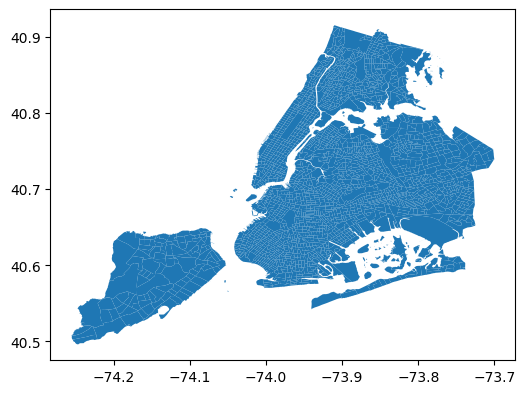

In [104]:
census_gdf.plot(figsize=(6,6))

In [121]:
#  using centract10 as key for merge
ct_acs = census_gdf.merge(final_demo, left_on='centract10', right_on = 'GEOID', how= 'outer')

In [126]:
ct_acs.centract10.nunique()

2165

In [127]:
# Drop rows with NaN, None, or 0 values in column 'centract10'

for_NTA_acs = ct_acs[ct_acs['centract10'].notna() & ct_acs['centract10'].ne(0)]

In [137]:
for_NTA_acs.shape

# shape desired for NTA

(2165, 72)

### Aggregating data to NTA

In [156]:
from geopandas.tools import sjoin

In [157]:
# loading NTA data
shapefile_path = 'C:/Users/sreya/Downloads/nta_2010-20230430T225135Z-001/nta_2010/geo_export_d66993ca-6cc0-4ee0-9b66-052e7675b5f0.shp'
NTA_gdf = gpd.read_file(shapefile_path)

<Axes: >

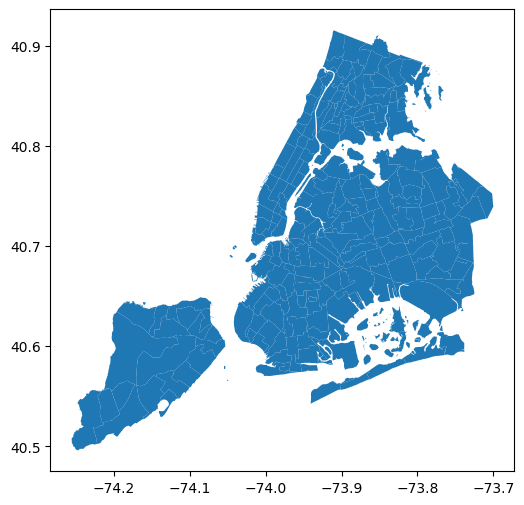

In [158]:
NTA_gdf.plot(figsize=(6,6))

In [159]:
NTA_gdf.shape

(195, 8)

In [144]:
print(NTA_gdf.crs)

GEOGCS["WGS84(DD)",DATUM["WGS84",SPHEROID["WGS84",6378137,298.257223563]],PRIMEM["Greenwich",0],UNIT["degree",0.0174532925199433],AXIS["Longitude",EAST],AXIS["Latitude",NORTH]]


In [145]:
# setting crs to both acs and NTA_gdf
NTA_gdf = NTA_gdf.set_crs(4326, allow_override=True)
for_NTA_acs = for_NTA_acs.set_crs(4326, allow_override=True)

In [153]:
# sjoin acs data + NTA
acs_nta = sjoin(NTA_gdf, for_NTA_acs, how='left', op='intersects')

In [154]:
acs_nta.head()

,boro_code,boro_name,county_fip,ntacode,ntaname,shape_area_left,shape_leng,geometry,index_right,comp2016,centract10,cenunits10,shape_area_right,comp2018,comp2011,comp2010,comp2019,withdrawn,total,objectid,comp2010ap,comp2014,adjunits10,comp2020,shape_length,comp2013,inactive,boro,permitted,comp2015,totaladj,approved,comp2012,comp2017,filed,bct2010,GEOID,d_Geographic Area Name,d_Total population,d_tot_male_pop,d_tot_female_pop,d_Under 5 years,d_5 to 9 years,d_10 to 14 years,d_15 to 19 years,d_20 to 24 years,d_25 to 29 years,d_30 to 34 years,d_35 to 39 years,d_40 to 44 years,d_45 to 49 years,d_50 to 54 years,d_55 to 59 years,d_60 to 64 years,d_65 to 69 years,d_70 to 74 years,d_75 to 79 years,d_80 to 84 years,d_85 years and over,total_population,white_no_lat,black_no_lat,native_no_lat,asian_no_lat,pacific_no_lat,other_race_no_lat,two_or_more_no_lat,hispanic_or_latino,males,median_age,household_number,family_households_number,median_income,gini_income_ineq,total_workers,poverty_status,income_per_capita,state,county,tract
0,4.0,Queens,081,QN08,St. Albans,7.741275e+07,45401.316803,"POLYGON ((-73.75205 40.70523, -73.75174 40.704...",1706,4,36081033000,2096,8809748.9284668,2,8,19,7,-1,2154,2101,15,4,2096,3,15092.5867994011,1,9,Queens,10,3,2154,0,8,3,5,4033000,36081033000,"Census Tract 330, Queens County, New York",7612.0,3350.0,4262.0,378.0,412.0,554.0,582.0,766.0,508.0,457.0,387.0,451.0,548.0,550.0,470.0,459.0,265.0,177.0,189.0,166.0,293.0,7192.0,73.0,6475.0,0.0,43.0,0.0,33.0,143.0,425.0,3274.0,36.6,2006.0,1576.0,33877.0,0.3411,3279.0,7162.0,27557.0,36,081,033000
0,4.0,Queens,081,QN08,St. Albans,7.741275e+07,45401.316803,"POLYGON ((-73.75205 40.70523, -73.75174 40.704...",2109,None,36081032800,796,3955124.64575195,4,6,6,4,2,828,2100,4,10,796,0,11128.6169609553,None,18,Queens,4,1,828,None,-1,4,None,4032800,36081032800,"Census Tract 328, Queens County, New York",2888.0,1315.0,1573.0,205.0,216.0,234.0,146.0,180.0,272.0,255.0,155.0,107.0,158.0,234.0,191.0,193.0,81.0,87.0,39.0,36.0,99.0,2769.0,27.0,2307.0,0.0,131.0,0.0,23.0,134.0,147.0,1257.0,34.6,720.0,602.0,32652.0,0.4339,1267.0,2711.0,34220.0,36,081,032800
0,4.0,Queens,081,QN08,St. Albans,7.741275e+07,45401.316803,"POLYGON ((-73.75205 40.70523, -73.75174 40.704...",1992,3,36081035800,1356,5641713.59959412,1,1,15,5,2,1389,1091,13,0,1356,3,9912.32669397735,1,3,Queens,4,0,1389,1,5,1,85,4035800,36081035800,"Census Tract 358, Queens County, New York",4887.0,2158.0,2729.0,178.0,398.0,302.0,283.0,433.0,403.0,231.0,301.0,392.0,275.0,457.0,375.0,272.0,115.0,222.0,144.0,45.0,61.0,4179.0,69.0,3604.0,0.0,23.0,0.0,0.0,19.0,464.0,1840.0,41.8,1292.0,990.0,38632.0,0.3857,1994.0,4173.0,35325.0,36,081,035800
0,4.0,Queens,081,QN08,St. Albans,7.741275e+07,45401.316803,"POLYGON ((-73.75205 40.70523, -73.75174 40.704...",340,None,36081033402,6271,8160701.98602295,2,1,3,2,1,6280,2008,3,1,6271,None,12442.8738618533,None,None,Queens,3,None,6280,1,None,None,None,4033402,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,4.0,Queens,081,QN08,St. Albans,7.741275e+07,45401.316803,"POLYGON ((-73.75205 40.70523, -73.75174 40.704...",1598,54,36081033401,1101,6035941.84646606,87,7,14,85,86,1495,2016,5,None,1101,90,10729.4483875397,4,4,Queens,10,56,1495,8,5,1,None,4033401,36081033401,"Census Tract 334.01, Queens County, New York",4065.0,1597.0,2468.0,259.0,300.0,225.0,277.0,229.0,341.0,206.0,307.0,364.0,265.0,161.0,212.0,270.0,286.0,171.0,132.0,18.0,42.0,3767.0,24.0,3037.0,8.0,134.0,0.0,35.0,39.0,490.0,1643.0,35.3,1153.0,909.0,39181.0,0.3901,1825.0,3681.0,31769.0,36,081,033401


In [155]:
acs_nta.shape

(3973, 80)